In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from numpy import concatenate
from pandas import *
from sklearn.preprocessing import *
from sklearn.metrics import *
from tensorflow import keras
import tensorflow as tf
import time as t

In [2]:
w=32

In [3]:
dataFromSensors=np.load("DataWithLabels/dataFromSensors_"+str(w)+".npy")

In [4]:
np.info(dataFromSensors)

class:  ndarray
shape:  (475305, 32, 16)
strides:  (4096, 128, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x23000003040
byteorder:  little
byteswap:  False
type: float64


In [5]:
labels=np.load("DataWithLabels/labels_"+str(w)+".npy")

In [6]:
np.info(labels)

class:  ndarray
shape:  (475305,)
strides:  (8,)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x22f8c13f040
byteorder:  little
byteswap:  False
type: float64


In [7]:
#values = reframed_df.values
#training_sample =int( len(dataset) *0.8)
training_sample_labels =int( len(labels) *0.8)
training_sample =int( len(dataFromSensors) *0.8)
#testDataset=DataFrame.to_numpy(dataset)
#testDataset=DataFrame.to_numpy(reframed_df)

In [8]:
training_sample_labels

380244

In [9]:
training_sample

380244

In [10]:
train_labels = labels[:training_sample]
train = dataFromSensors[:training_sample, : ,:]
test_labels = labels[training_sample:]
test = dataFromSensors[training_sample:, : , :]
# split into input and outputs
#train_X, train_y = train[:,:, 1:], train[:,:,0]
#test_X, test_y = test[:,:, 1:], test[:,:,0]
train_X, train_y = train[:,:, 1:], train_labels[:]
test_X, test_y = test[:,:, 1:], test_labels[:]

In [11]:
train_X.shape

(380244, 32, 15)

In [12]:
train_y

array([0., 0., 0., ..., 0., 0., 0.])

In [13]:
#print(train_X)

In [14]:
train_y.shape

(380244,)

In [15]:
#print(test_y)

In [16]:
train_y=train_y.reshape(train_y.shape[0],1)

In [17]:
test_y=test_y.reshape(test_y.shape[0],1)

In [18]:
#print(train_X)

In [19]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(380244, 32, 15) (380244, 1) (95061, 32, 15) (95061, 1)


In [20]:
model_gru =  keras.models.Sequential([
    keras.layers.GRU(128,return_sequences=True,input_shape=(train_X.shape[1],train_X.shape[2])),#,activation='relu'),
    keras.layers.GRU(units=64,return_sequences=True),#activation='relu'),
    keras.layers.GRU(units=32),#activation='relu'),
    keras.layers.Dense(units=50,activation='sigmoid'),
    keras.layers.Dense(units=1,activation='sigmoid')
                        ])
model_gru.compile(loss='binary_crossentropy', optimizer='sgd',metrics=['accuracy'])

In [21]:
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 32, 128)           55680     
                                                                 
 gru_1 (GRU)                 (None, 32, 64)            37248     
                                                                 
 gru_2 (GRU)                 (None, 32)                9408      
                                                                 
 dense (Dense)               (None, 50)                1650      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 104,037
Trainable params: 104,037
Non-trainable params: 0
_________________________________________________________________


In [22]:
 start = t.time()

In [23]:
# fit network
gru_history = model_gru.fit(train_X, train_y, epochs=140,validation_data=(test_X, test_y), batch_size=128)#, shuffle=False)

Epoch 1/140
2971/2971 [==============================] - 79s 22ms/step - loss: 0.5740 - accuracy: 0.7383 - val_loss: 0.5571 - val_accuracy: 0.7530
Epoch 2/140
2971/2971 [==============================] - 63s 21ms/step - loss: 0.5660 - accuracy: 0.7393 - val_loss: 0.5448 - val_accuracy: 0.7530
Epoch 3/140
2971/2971 [==============================] - 63s 21ms/step - loss: 0.5362 - accuracy: 0.7402 - val_loss: 0.5044 - val_accuracy: 0.7537
Epoch 4/140
2971/2971 [==============================] - 63s 21ms/step - loss: 0.5089 - accuracy: 0.7382 - val_loss: 0.4913 - val_accuracy: 0.7493
Epoch 5/140
2971/2971 [==============================] - 63s 21ms/step - loss: 0.5028 - accuracy: 0.7369 - val_loss: 0.4863 - val_accuracy: 0.7530
Epoch 6/140
2971/2971 [==============================] - 63s 21ms/step - loss: 0.5007 - accuracy: 0.7384 - val_loss: 0.4863 - val_accuracy: 0.7532
Epoch 7/140
2971/2971 [==============================] - 62s 21ms/step - loss: 0.4992 - accuracy: 0.7390 - val_loss: 0

2971/2971 [==============================] - 60s 20ms/step - loss: 0.4406 - accuracy: 0.7737 - val_loss: 0.4361 - val_accuracy: 0.7760
Epoch 57/140
2971/2971 [==============================] - 61s 21ms/step - loss: 0.4403 - accuracy: 0.7738 - val_loss: 0.4373 - val_accuracy: 0.7757
Epoch 58/140
2971/2971 [==============================] - 62s 21ms/step - loss: 0.4399 - accuracy: 0.7741 - val_loss: 0.4345 - val_accuracy: 0.7766
Epoch 59/140
2971/2971 [==============================] - 61s 21ms/step - loss: 0.4398 - accuracy: 0.7742 - val_loss: 0.4338 - val_accuracy: 0.7766
Epoch 60/140
2971/2971 [==============================] - 61s 21ms/step - loss: 0.4396 - accuracy: 0.7742 - val_loss: 0.4348 - val_accuracy: 0.7762
Epoch 61/140
2971/2971 [==============================] - 61s 21ms/step - loss: 0.4392 - accuracy: 0.7745 - val_loss: 0.4356 - val_accuracy: 0.7766
Epoch 62/140
2971/2971 [==============================] - 62s 21ms/step - loss: 0.4391 - accuracy: 0.7744 - val_loss: 0.4383 

2971/2971 [==============================] - 60s 20ms/step - loss: 0.4267 - accuracy: 0.7810 - val_loss: 0.4264 - val_accuracy: 0.7832
Epoch 112/140
2971/2971 [==============================] - 61s 21ms/step - loss: 0.4265 - accuracy: 0.7811 - val_loss: 0.4257 - val_accuracy: 0.7824
Epoch 113/140
2971/2971 [==============================] - 61s 21ms/step - loss: 0.4264 - accuracy: 0.7812 - val_loss: 0.4266 - val_accuracy: 0.7816
Epoch 114/140
2971/2971 [==============================] - 63s 21ms/step - loss: 0.4261 - accuracy: 0.7818 - val_loss: 0.4309 - val_accuracy: 0.7769
Epoch 115/140
2971/2971 [==============================] - 64s 22ms/step - loss: 0.4262 - accuracy: 0.7818 - val_loss: 0.4250 - val_accuracy: 0.7825
Epoch 116/140
2971/2971 [==============================] - 62s 21ms/step - loss: 0.4259 - accuracy: 0.7819 - val_loss: 0.4265 - val_accuracy: 0.7824
Epoch 117/140
2971/2971 [==============================] - 63s 21ms/step - loss: 0.4256 - accuracy: 0.7820 - val_loss: 0

In [24]:
pred_y =  model_gru.predict(test_X)

2971/2971 [==============================] - 21s 7ms/step


In [25]:
stop=t.time()-start
print(stop)

8681.499318599701


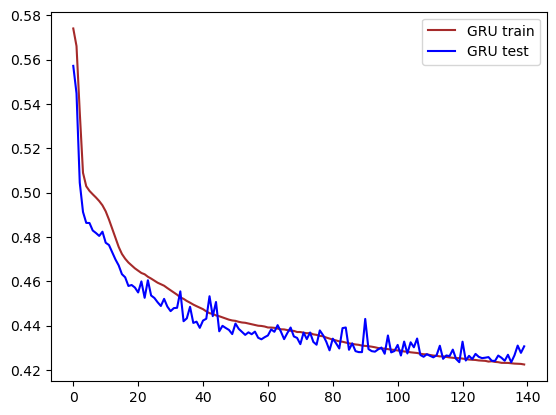

In [26]:
plt.plot(gru_history.history['loss'], label='GRU train', color='brown')
plt.plot(gru_history.history['val_loss'], label='GRU test', color='blue')
plt.legend()
plt.show()

In [27]:
print(test_y)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [28]:
np.shape(pred_y)

(95061, 1)

In [29]:
pred_y

array([[0.0023145 ],
       [0.01111389],
       [0.00351905],
       ...,
       [0.0380477 ],
       [0.03937908],
       [0.0413217 ]], dtype=float32)

In [30]:
pred_y=np.reshape(pred_y,95061)

0.14333871214994473
0.22923475189157538
0.37860099332931596
0.28217467006584535


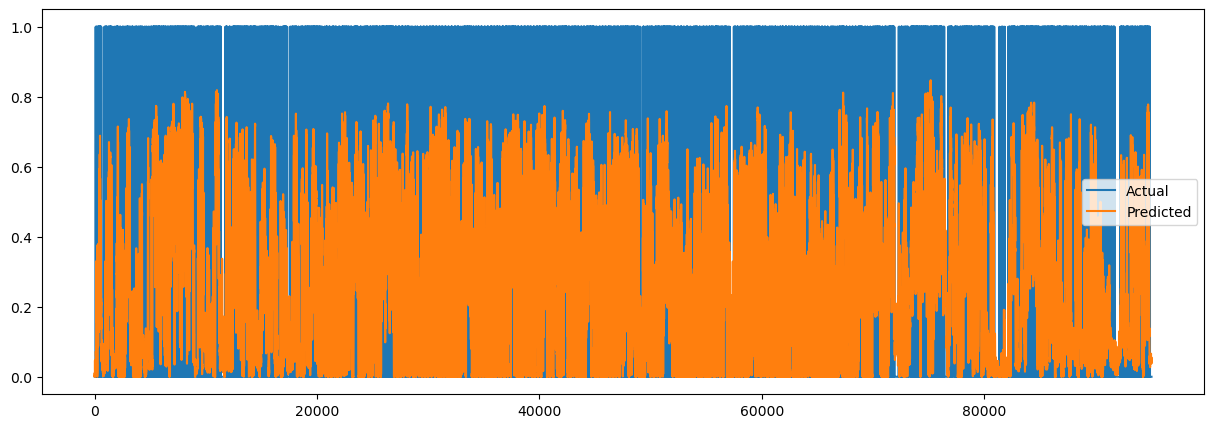

In [31]:

plt.rcParams['figure.figsize'] = (15,5)

MSE = mean_squared_error(test_y, pred_y)
R2 = r2_score(test_y, pred_y)
RMSE = sqrt(mean_squared_error(test_y, pred_y))
MAE = mean_absolute_error(test_y, pred_y)


print(MSE)
print(R2)
print(RMSE)
print(MAE)


plt.plot(test_y, label = 'Actual')
plt.plot(pred_y, label = 'Predicted')
plt.legend()
plt.show()

In [32]:
np.shape(train_X)

(380244, 32, 15)

In [33]:
np.shape(train_y)

(380244, 1)

In [34]:
np.shape(test_X)

(95061, 32, 15)

In [35]:
np.shape(test_y)

(95061, 1)

14854/14854 [==============================] - 98s 7ms/step


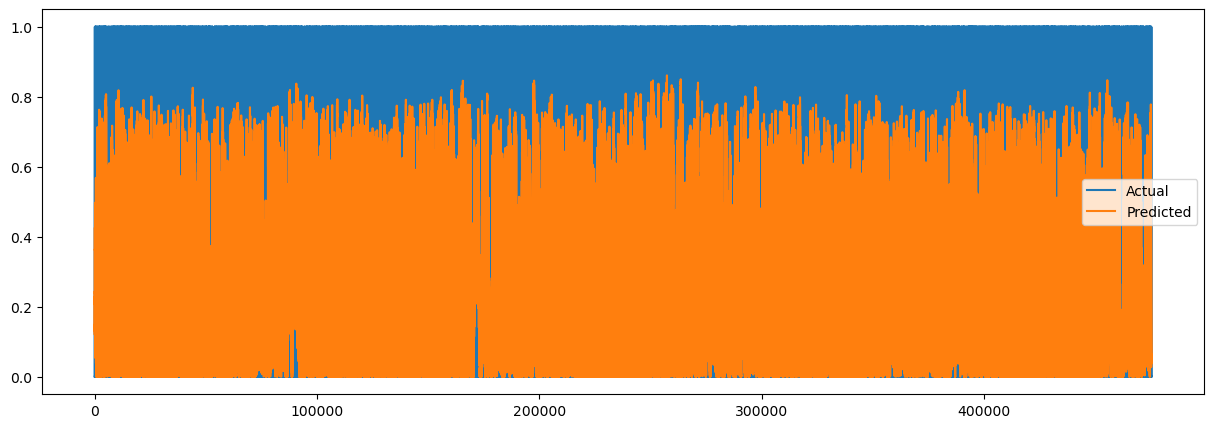

In [36]:
tra = np.concatenate([train_X,test_X])
tes = np.concatenate([train_y,test_y])
fp = model_gru.predict(tra)
plt.plot(tes, label = 'Actual')
plt.plot(fp, label = 'Predicted')
plt.legend()
plt.show()

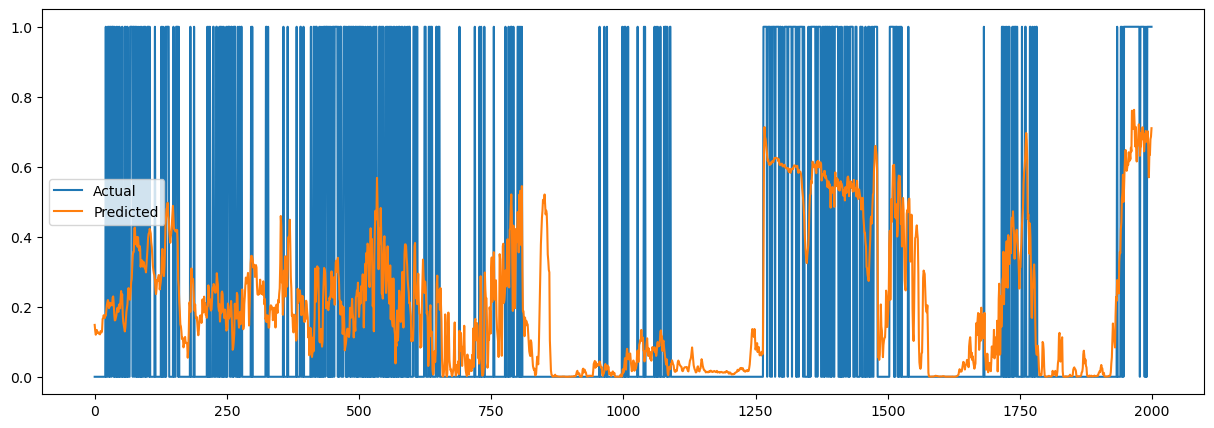

In [37]:
plt.plot(tes[:2000], label = 'Actual')
plt.plot(fp[:2000], label = 'Predicted')
plt.legend()
plt.show()

In [38]:
print(sum(tes)/len(tes))

[0.25795437]


In [39]:
#print(fp[1000:1010])
_fp = np.where(fp>0.5,1,0)
_all = sum(_fp)
_w = (_fp*tes)
print(sum(_w)/_all)
      
_all_z = sum(1-_fp)      
_w_z = (1-_fp)*(1-tes)
print(sum(_w_z)/_all_z)
print('total acc', (sum(_w)+sum(_w_z))/len(_w))

[0.60902969]
[0.8235439]
total acc [0.78312873]


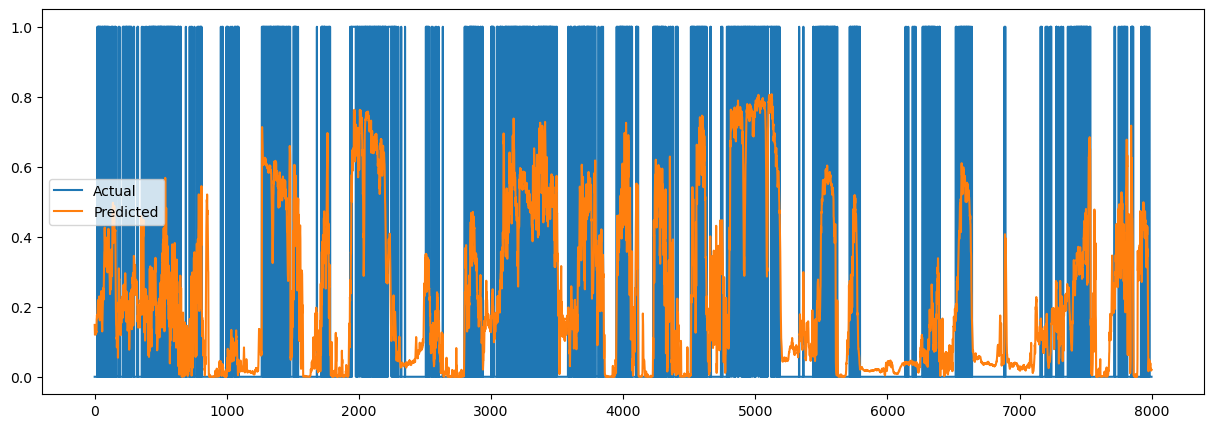

In [40]:
plt.plot(tes[:8000], label = 'Actual')
plt.plot(fp[:8000], label = 'Predicted')
plt.legend()
plt.show()

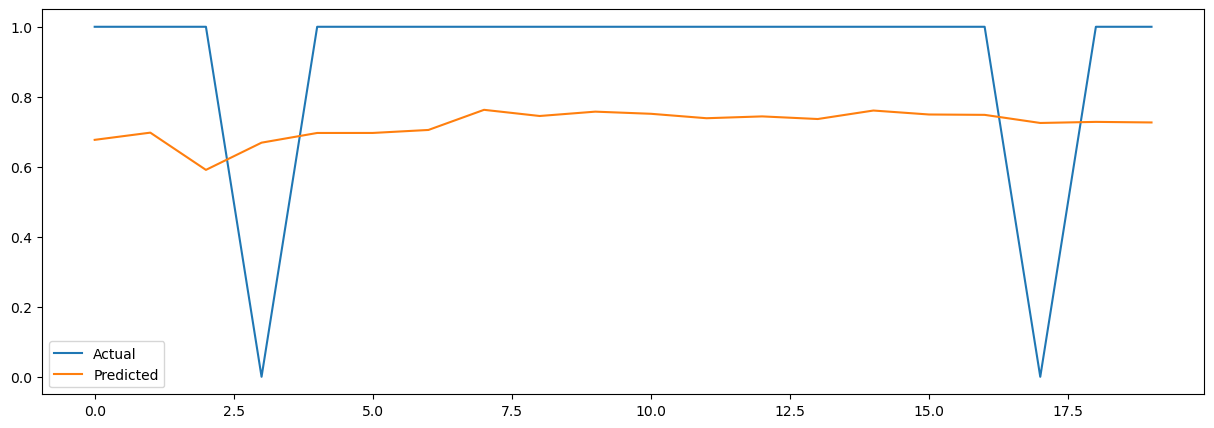

In [41]:
#over very small part of data
plt.plot(tes[2000:2020], label = 'Actual')
plt.plot(fp[2000:2020], label = 'Predicted')
plt.legend()
plt.show()

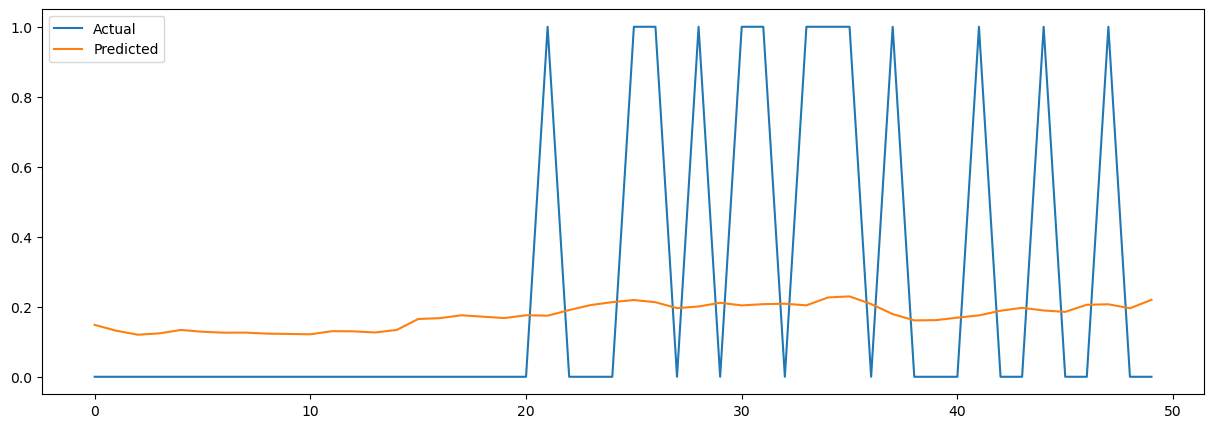

In [42]:
plt.plot(tes[:50], label = 'Actual')
plt.plot(fp[:50], label = 'Predicted')
plt.legend()
plt.show()

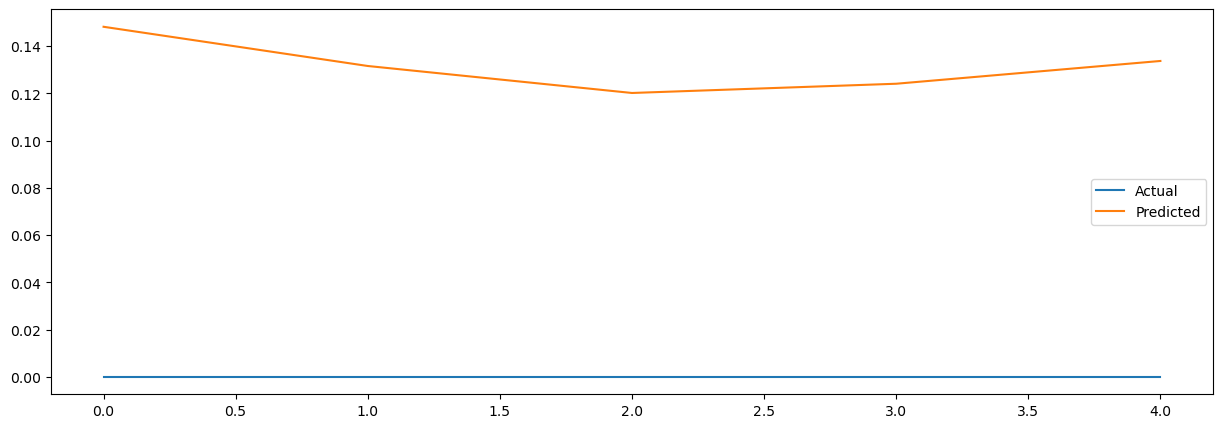

In [43]:
plt.plot(tes[:5], label = 'Actual')
plt.plot(fp[:5], label = 'Predicted')
plt.legend()
plt.show()